In [7]:
import panel as pn

pn.extension()

The ``Matplotlib`` pane allows displaying any displayable [Matplotlib](http://matplotlib.org) figure inside a Panel app. It will render the plot to PNG at the declared DPI and then embed it. If you find the figure to be clipped on the edges, you can set `tight=True` to automatically resize objects to fit within the pane.

#### Parameters:

* **``dpi``** (int, default=144): The dots per inch of the exported png
* **``interactive``** (boolean, default=False): Whether to use the interactive ipympl backend
* **``tight``** (bool, default=False): Automatically adjust the figure size to fit the subplots and other artist elements.
* **``object``** (matplotlib.Figure): The Matplotlib Figure object to display

___

Note that the examples below do not make use of the common ``matplotlib.pyplot`` API in order to avoid having to close the figure. If not closed, it could cause memory leaks and cause the `inline` backend to automatically display the figure. It is actually as simple as creating a `matplotlib.Figure` object, registering axes to this figure, and passing the figure to the `Matplotlib` pane that will take care of rendering it.


Matplotlib(Figure)
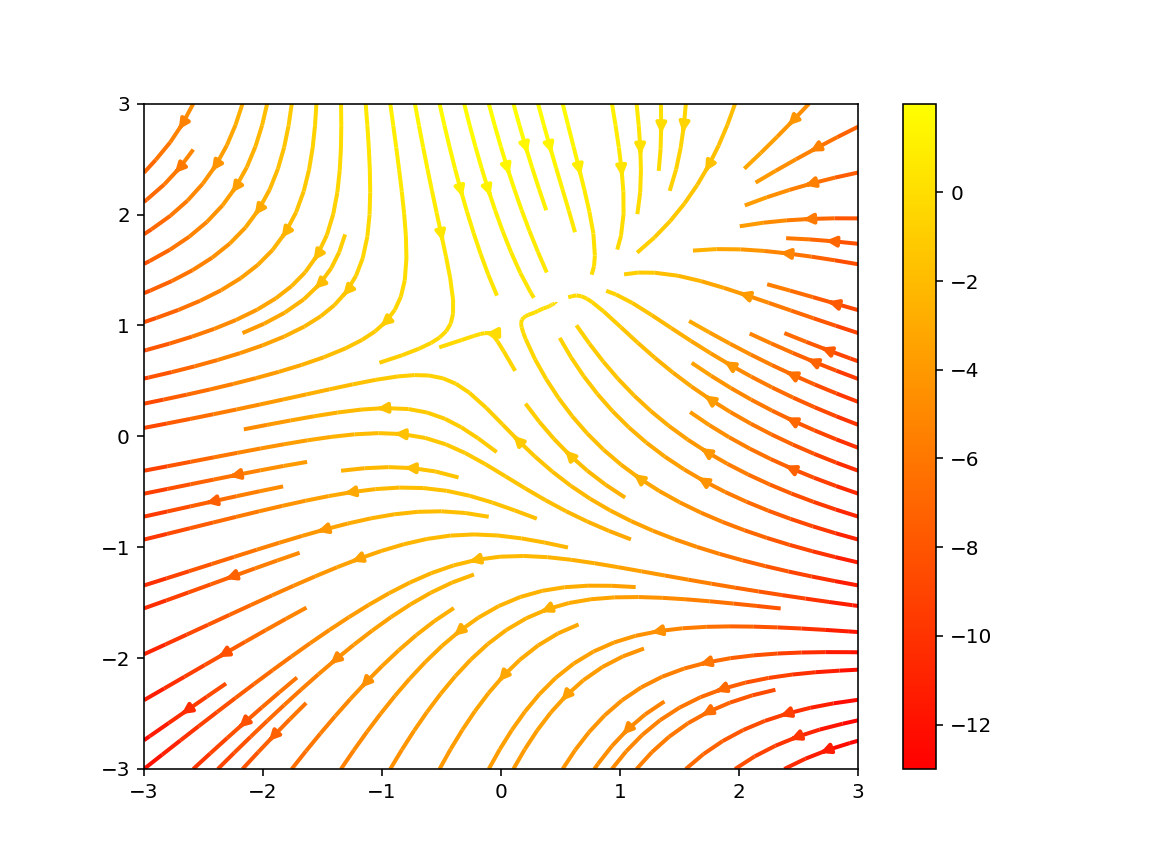

In [8]:
import numpy as np

from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas  # not needed for mpl >= 3.1

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0 = Figure(figsize=(8, 6))
ax0 = fig0.subplots()
FigureCanvas(fig0)  # not needed for mpl >= 3.1

strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=cm.autumn)
fig0.colorbar(strm.lines)

mpl_pane = pn.pane.Matplotlib(fig0, dpi=144)
mpl_pane

By modifying the figure and using the ``trigger`` method on the pane's object we can easily update the plot:

In [9]:
strm.lines.set_cmap(cm.viridis)

mpl_pane.param.trigger('object')

Alternatively, like all other models, a ``Matplotlib`` pane can be updated by setting the ``object`` directly:

In [10]:
from mpl_toolkits.mplot3d import axes3d

fig = Figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
FigureCanvas(fig)  # not needed for mpl >= 3.1

X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

mpl_pane.object = fig

If you have installed `ipympl` you will also be able to use the `interactive` backend:

In [11]:
fig = Figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

cf = ax.contourf(x + dx/2., y + dy/2., z)
fig.colorbar(cf, ax=ax)

pn.pane.Matplotlib(fig, interactive=True, dpi=72)

Matplotlib(Figure, dpi=72, interactive=True)

### Controls

The `Matplotlib` pane exposes a number of options which can be changed from both Python and Javascript. Try out the effect of these parameters interactively:

Row
    [0] WidgetBox(name='Layout', width=300)
        [0] StaticText(value='<b>Layout</b>')
        [1] TextInput(disabled=True, name='Name', value='Matplotlib00101')
        [2] LiteralInput(name='Align', serializer='json', value='start')
        [3] LiteralInput(name='Aspect ratio', serializer='json')
        [4] LiteralInput(name='Background', serializer='json')
        [5] ListInput(name='Css classes', serializer='json', type=<class 'list'>)
        [6] IntInput(name='Min width', start=0)
        [7] IntInput(name='Min height', start=0)
        [8] IntInput(name='Max width', start=0)
        [9] IntInput(name='Max height', start=0)
        [10] LiteralInput(name='Margin', serializer='json', value=5)
        [11] Select(name='Width policy', options=OrderedDict([('auto', ...]), value='auto')
        [12] Select(name='Height policy', options=OrderedDict([('auto', ...]), value='auto')
        [13] Select(name='Sizing mode', options=OrderedDict([('fixed', ...]))
        [14] Checkbox(name='Visible', value=True)
    [1] Matplotlib(Figure)
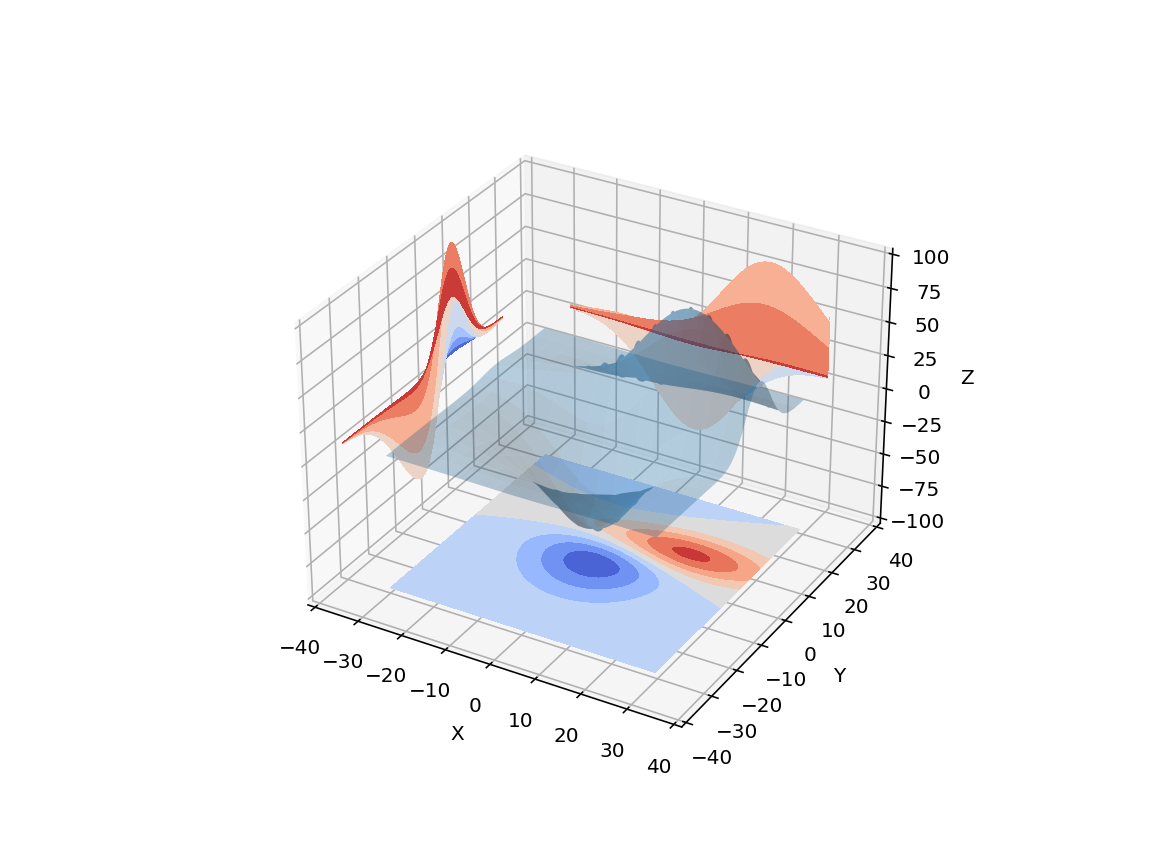

In [6]:
pn.Row(mpl_pane.controls(jslink=True), mpl_pane)